# Scipy and the Vapor-Liquid Saturation Pressure from the van der Waals Equation of State
In this notebook we present numerical evaluation of density and residual properties for given values of pressure and temperature using the van der Waals Equation of State. Then, using these calculations we present a numerical evaluation of the saturation pressure for liquid-vapor equilibra at a given temperature.

> **Here you will meet the following topics:**
>- Thermodynamics: *equation of state*, *calculation of*: *density*, *residual properties*, *saturation point pressure*
>- Python: `scipy`: `roots`, `optimize`: `bisect`

Supose you have to solve the following problem in a thermodynamics course:
>"Calculate the saturation pressure for pure hexane at the temperature of 220 K according to the van der Waals equation of state"

Here, we will show how to implement a function to calculate density of a pure fluid at given T and P.
Then, how to calculate the residual properties. And at last, how to calculate the saturation pressure.

We will use numpy again

In [1]:
import numpy as np

We will also use the Scipy package., more specifically, we will use the  optimize module.
The following syntax for importing packages is slightly different from the previous one. Nonetheless, both of them work in the same way. Here, we import only a subset of the resources of scipy, the subset identified as optimize.

In [2]:
from scipy import optimize as opt
#from <-- keyword "from"
     #scipy <-- name of the package
           #import <-- keyword "import"
                  #optimize <-- name of the desired module
                           #as <-- keyword "as" to introduce an alias
                              #opt <-- alias name

Consider the *van der Waals* equation of state (Reid et al., 1987, see Eq 3-6.1 and Table 3-5, line 1)

$P=\frac{RT}{\bar{V}-b}-\frac{a}{{\bar{V}}^{2}}$

$a=\frac{27}{64}\frac{{{Tc}^{2}}{R^{2}}}{Pc}$


$b=\frac{{R}{Tc}}{{8}{Pc}}$

where $R$ is the gas constant 

$R = 8.3144598$ $\mathrm{{J} {mol^{−1}} {K^{−1}}}$

and critical properties for hexane are 

$Tc = 507.5$ $\mathrm{K}$


$Pc = 30.1$ $\times {10^5}$ $\mathrm{Pa}$

So let's code this information, as in notebook 2:

First, the universal gas constant ($R$) is assigned to the variable named `R`

In [3]:
#gas constant
R = 8.3144598 #J.mol^−1.K^−1

Now, we assign the values of the critical properties of hexane ($Tc$ and $Pc$) to variables `Tc` and `Pc`.

In [4]:
#pure component critical point of hexane
# Tc (K)
Tc = 507.5 #K

# Pc (Pa)
Pc = 30.1*(10**5) #Pa

Finally, we create variables `a` and `b` for the EoS parameters $a$ and $b$.

In [5]:
a = 27/64*((Tc**2)*(R**2)/Pc)
print(a)

2.4954993637433445


In [6]:
b = (R*Tc)/(8*Pc)
print(b)

0.0001752320742732558


Here, we are interested in calculating $\bar{V}$ for a given substance, therefore we will calculate $\bar{V}$ given $a$ and $B$, at some condition of $P$ and $T$. For that purpose we convert the explicit $P(T,\bar{V})$ representation of the EoS to an implicit representation. We can then find a repreesentation that corresponds to a 3$^{\mathrm{rd}}$ degree polynomial in $\bar{V}$, with coefficients depending on $P$, $T$, $a$ and $b$. Therefore, for a given substance (represented by a pair of $a$ and $b$), at given $P$ and $T$, the density can be obtained by solving this polynomial for $\bar{V}$.

${P}{{\bar{V}}^3}−({P}{b}+{R}{T}){{\bar{V}}^2}+{a}{\bar{V}}−{a}{b}={0}$

Let's define the temperature and pressure at which we want to perform the density calculation.

In [7]:
#calculate density at what temperature and pressure?
T = 220. #K
P = 1*(10**5) #Pa

Then, let's define the coefficients of the polynomials:

In [8]:
c3 = P #coefficient for v^3
c2 = -(P*b+R*T) #coefficient v^2
c1 = a  #coefficient v^1
c0 = -a*b  #coefficient v^0

The volume is finally obtained by finding the roots of the polynomial.

In [9]:
v=np.roots([c3,c2,c1,c0]) #numpy  roots finds the roots of a polynomial
#coefficients must be provided in a list form, constructed using the square brackets
#result is the list of real and imaginary roots found.
print(v)

[ 0.01701555  0.00124509  0.00020641]


Here, after solving a 3$^{\mathrm{rd}}$ degree polynomial, we may obtain three real valued roots. If three roots are found in the interval $(b,\infty )$, the minimum  and maximum corresponds to liquid and vapor aggregation states, respectively, while the intermediate root does not correspond to a phisycally relevant state.

According to the principle of minimum Gibbs energy, at given $P$, $T$ (and quantity of matter), the state with least Gibbs energy is the *stable equilibrium state*. Therefore we must compare the Gibbs energy of these *states* to reveal which corresponds to the *stable equilibrium state*. While we are not able to calculate absolute values of Gibbs energy using an equation of state, we are able to calculate relative values of Gibbs energy for both vapor and liquid states with a common reference associated with the ideal gas state. The relative scale of Gibbs energy we use here is the residual Gibbs energy, since both roots are at the same temperature and pressure.

In [10]:
[v_Liq, v_intermediate, v_Vap] = np.sort(v)
print(v_Liq)
print(v_intermediate)
print(v_Vap)
v=np.array([v_Liq, v_intermediate, v_Vap]) #numpy.array is a special type of list with which numpy methods (e.g. numpy. exp, numpy.log) can work

0.000206407191559
0.00124508874657
0.0170155476961


## The residual Gibbs energy
For the van der Waals EoS, the expression for the residual Gibbs energy ($\bar{G}^{Res}$) is:

$${\bar{G}^{Res}} = P\bar{V}-RT-\frac{a}{\bar{V}} -RTln \left (\frac{P(\bar{V}-b)}{RT} \right )$$

For the origin and discussion of residual thermodynamics properties, see the references below:
> `Smith, van Ness, Abbott, 2005, 7th-pt-BR, Ch. (6.2, 6.3)
> O'Connell and Haile, 2005, Ch. 4
> Tester and Modell, 1997, Ch. 9.`

In [11]:
Residual_G = (P*v)-(R*T)-(a/v) - T*(R*np.log(P*(v-b)/(R*T))) 
print(T, "K", P, "Pa", Residual_G)

220.0 K 100000 Pa [-2238.4396586   1483.96852119  -123.05374806]


Here you can note that the lowest Gibbs energy yielded correspond to the liquid phase. It means that, at this pressure and temperature, the liquid phase is the stable equilibrium state.

## Calculation of saturation pressure

Now, the saturation pressure is the pressure $P$ that makes the difference in residual Gibbs energy between trial liquid and vapor phase equals zero at a given temperature. We cannot explicitate $P$ as a function of the difference in residual Gibbs energy, so we define a function $\Delta G^{Res}$ of $P$
and we will solve it numerically, i.e. trying various values of $P$ according to a updating methodology and convergence criteria.

To automate that task we implement a function called **`def Delta_Residual_G(P):`**, which calculates the roots of volume, as before, and evaluates the difference between residual Gibbs energy in each of these states.

In [12]:
#define equilibrium criteria:
#Residual_G_Liquid is equal to Residual_G_Vapor :. 
#mathematically:
#Delta_Residual_G = zero :.
#in practical implementation for a numerical solution:
#Delta_Residual_G < Tolerance
def Delta_Residual_G(T,P):
    c3 = P #coefficient for v^3
    c2 = -(P*b+R*T) #coefficient v^2
    c1 = a  #coefficient v^1
    c0 = -a*b  #coefficient v^0
    
    V = np.roots([c3,c2,c1,c0])
    
    #note that near the critical point, the numerical methods underlying the roots function may yield results with a complex part
    #here we discard any volume root for which the complex part is significant (higher then a given tolerance of 1e9i)
    V = V[ V.imag < 1e9 ].real #filter out complex roots
    V = V[ np.where( V > b ) ] #filter out non physical roots
    
    Vl = min(V)
    Vv = max(V)
    #print(P, V) #if you uncomment this line you will see every iteration in the output section of this cell
    return (P*(Vl-Vv) + (-a)*(1/(Vl)-1/(Vv))+T*(R*np.log((Vv-b)/(Vl-b))))

#test for T=220 and close to atmospheric pressure
print(Delta_Residual_G(220,100000))
#negative value means G_liq is lower

-2115.38591053


What follows is similar to the work of Topliss et al.,:
> Topliss, Robert J., Dimitrios Dimitrelis, and John M. Prausnitz. 1988. “Computational Aspects of a Non-Cubic Equation of State for Phase-Equilibrium Calculations. Effect of Density-Dependent Mixing Rules.” Computers & Chemical Engineering 12 (5): 483–89. doi:10.1016/0098-1354(88)85067-1.

To calculate saturation pressure for a given $T$, first we isolate the range of pressure where fluid phase equilibria can occur:
That is the range of pressure where there are 3 valid roots of volume (keep in mind the isotherms presented in notebook 2). The maximum and minimum pressure that presents 3 valid roots for volume we will call `P_upper_plateau` and `P_lower_plateau` respectively. 

> given
> 
> $T$,
> 
> find all possible
> 
> $\bar{V}^*$,
> 
> so that
> 
> $\left(\frac{\partial P}{  \partial \bar{V}}\right)_{T}=0$
> 
> in
> 
> $\bar{V}^* \in (b,\infty)$.
> 
> Then, find the corresponding
> 
> $P^* = P(T,\bar{V}^*)$.

Analytical development of the partial derivative yields:

$\left(\frac{\partial P}{  \partial \bar{V}}\right)_{T}=-\frac{RT}{(\bar{V}-b)^2} + \frac{2a}{\bar{V}^3}$

Therefore in the stationary points, the following equality is true:

$-\frac{RT}{(\bar{V}-b)^2} + \frac{2a}{\bar{V}^3}=0$

It represents another 3rd order polynomial in $\bar{V}$ (not the same from the problem of finding $\bar{V}$ given $P$ and $T$), as follows:

$-{RT}{\bar{V}^3} + {2a}{(\bar{V}-b)^2}=0$

$-{RT}{\bar{V}^3} + {2a}{(\bar{V})^2}+{2a}{(b)^2}+{2a}{(-2\bar{V}b)}=0$

In [13]:
#calculate each coeffcient of the polynomial-in-V representation of dP/dV=0
def Plimits(T):
    rho = R*T
    mu = 2*(-a)
    nu = - b*(a*(-4))
    omega=- 2*(b**2)*(a*(1))
    #and use the method "roots" from package "numpy" to calculate the roots of this polynomial and assing the solutions to the variable plateaus as an array
    plateaus = np.roots([rho,mu,nu,omega])
#    print("plateaus:", plateaus)

    #filter out values of plateu corresponding to non-physical volume (less than b or complex)
    plateaus = plateaus[ np.where( plateaus > b ) ] #using the numpy function 'where

#    print("plateaus:", plateaus)
    Vli = min(plateaus)
    Vvi = max(plateaus)

    #find the corresponding values of pressure for each filtered volume
    Psup = R*T/(Vvi-b)-a/(Vvi*Vvi)
    Psupi=Psup*.999

    Pinf = R*T/(Vli-b)-a/(Vli*Vli)

    #note that the algorithm cannot work with pressure less than or equal to zero, therefore fix minimium pressure to slightly above zero if it was negative

    if Pinf > 0:
        Pinfi = Pinf*1.001
    else:
        Pinfi = 0.000000001
        
    return [Vli,Vvi,Psupi,Pinfi]

[Vli,Vvi,Psupi,Pinfi]=Plimits(220)

print("Vli:",Vli)
print("Vvi:",Vvi)
print("Psupi:",Psupi)
print("Pinfi:",Pinfi)

Vli: 0.000251661242908
Vvi: 0.00233425727852
Psupi: 388842.000342
Pinfi: 1e-09


Now we must find the solution $P$. Thus, we ask the package optmize to use the bissect method and solve the equilibrium criteria (equality of residual Gibbs free energy for both phases):


In [14]:
#Here, bisect is a numerical method that works on a function of 1 variable
#However note that we wrote Delta_Residual_G as a function of 2 variables: T and P
#So, to implement a handle of a function of one variable (P) that the method can wok with
#and that corresponds to the previosuly defined d_G_Res(T,P) at one given T
#we do the following
def Delta_Residual_G_at_220K(P): #P appears here as the 1 variable inut argument
    return Delta_Residual_G(220,P) #Temperature apppears hard-coded here as 220 K

print(Delta_Residual_G(220,100000))
print(Delta_Residual_G_at_220K(100000))

-2115.38591053
-2115.38591053


In [15]:
P_sat = opt.bisect(Delta_Residual_G_at_220K,
                   Pinfi,
                   Psupi,
                   xtol=1.0e-9,
                   rtol=1.0e-9,
                   maxiter=100,
                   full_output=True,
                   disp=True)
print("Saturation pressure = ",P_sat[0]," Pa (", P_sat[0]/10**5, "bar )" )bbb

Saturation pressure =  29756.11279369196  Pa ( 0.2975611279369196 bar )


In the first element (index 0) of the returning array of `optmize.bisect` we read the value of the saturation pressure
in the second element we read additional information about the execution of the numerical method.

In [16]:
print(P_sat[1])

      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 29756.11279369196


# Grid, Calc and Plot

In [17]:
def calc_Psat(T_in):
    givenT=T_in
#Here, bisect is a numerical method that works on a callback function of 1 variable
#it is called a callback function because we call bisectt, and tell it to make a call back to our function as needed to perform its purpose, i.e. of finding the solution to the function.
#However note that we wrote the function Delta_Residual_G as a function of 2 variables: T and P
#So, to implement a handle of a function of one variable (P) that the method can work with as its callback function
#and which results corresponds to the previosuly defined Delta_Residual_G(T,P) at one given T
#we do the following
    def Delta_Residual_G_givenT(P): #P appears here as the 1 variable inut argument
        return Delta_Residual_G(givenT,P) #T apppears here and is obained from the surrounding scope, see below the tests:
    
    [_,_,Pinfi,Psupi]=Plimits(givenT)
    ans = opt.bisect(Delta_Residual_G_givenT, Pinfi, Psupi, xtol=1.0e-9, rtol=1.0e-9, maxiter=100, full_output=True, disp=True)
    return ans[0]

#test
print(calc_Psat(220))

29756.112793691944


In [18]:
T=100
grid_T=np.linspace(100,Tc,100)
grid_P=np.zeros(100)
grid_P[0]=calc_Psat(grid_T[0])
for i in range(1,100):
    grid_P[i]=calc_Psat(grid_T[i])
    #print(i,grid_T[i],grid_P[i])

In [19]:
#compare with Antoine fits:
def PAntoine_nist(T): #http://webbook.nist.gov/cgi/cbook.cgi?ID=C110543&Mask=4
    if T < 177.70:
        return 0
    elif T < 264.93:
        A=3.45604
        B=1044.038
        C=-53.893
        return (10**( A - (B / (T + C)) )   )* 10**5
    elif T < 286.18:
        return 0
    elif T<342.69:
        A=4.00266
        B=1171.53
        C=-48.784
        return (10**( A - (B / (T + C)) )   )* 10**5
    else:
        return 0
    
def PAntoine_ddbst(T): #http://ddbonline.ddbst.com/AntoineCalculation/AntoineCalculationCGI.exe
    A=7.01051
    B=1246.33
    C=232.988
    return (10**( A - (B / (T - 273 + C)) )   )* 101325/760.0

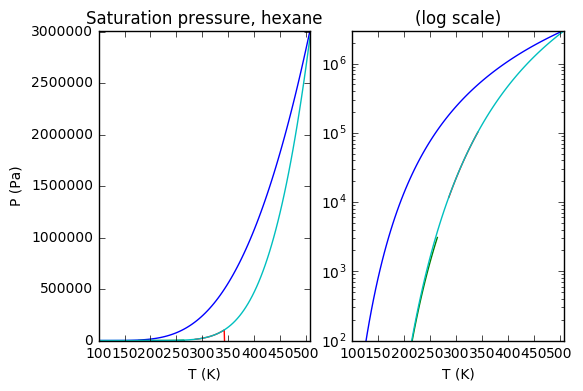

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#activate a figure 1
plt.figure(1)
plt.subplot(121) #activate a subplot
plt.title('Saturation pressure, hexane')

#plot the calculated Psat x T

#filter not-a-number and zeros
grid_P_real = ~np.isnan(grid_P)
filtered_grid_T = grid_T[ np.where( grid_P_real ) ]
filtered_grid_P = grid_P[ np.where( grid_P_real ) ]

#plot

plt.plot(filtered_grid_T,filtered_grid_P)

#calculate Antoine correlations

## nist
grid_TAntoine_nist_1 = np.linspace(177.7,264.93,100)
grid_PAntoine_nist_1 = np.array([ PAntoine_nist(grid_TAntoine_nist_1[i]) for i in range(100) ])

grid_TAntoine_nist_2 = np.linspace(286.18,342.69,100)
grid_PAntoine_nist_2 = np.array([ PAntoine_nist(grid_TAntoine_nist_2[i]) for i in range(100) ])

# plot
plt.plot(grid_TAntoine_nist_1,grid_PAntoine_nist_1)
plt.plot(grid_TAntoine_nist_2,grid_PAntoine_nist_2)

## ddbst
grid_TAntoine_ddbst = np.linspace(100,Tc,100)
grid_PAntoine_ddbst = np.array([ PAntoine_ddbst(grid_TAntoine_ddbst[i]) for i in range(100) ])

# plot

plt.plot(grid_TAntoine_ddbst,grid_PAntoine_ddbst)

# aditional options

## y and x axis limits
plt.xlabel('T (K)')
plt.ylabel('P (Pa)')
plt.xlim([100,Tc])
plt.ylim([0,Pc])

#activate a subplot
plt.figure(1)
plt.subplot(122) #activate a subplot

plt.title('(log scale)')

# same plot, now in log scale
plt.semilogy(filtered_grid_T,filtered_grid_P)
plt.semilogy(grid_TAntoine_nist_1,grid_PAntoine_nist_1)
plt.semilogy(grid_TAntoine_nist_2,grid_PAntoine_nist_2)
plt.semilogy(grid_TAntoine_ddbst,grid_PAntoine_ddbst)
plt.xlabel('T (K)')
plt.xlim([100,Tc])
plt.ylim([100,Pc])
plt.show()

## Conclusion
In this notebook, a simple cubic equation of state was used to calculate the volume, the residual Gibbs energy and the saturation pressure of a pure fluid. Here, the saturation pressure was obtained by finding a pressure that would lead to equal residual Gibbs energy between two phases. In order to achieve that, this notebook introduced key concepts of phase equilibrium calculation (equality of molar Gibbs energy, for instance) and major tools for applied thermodynamics, such as root finding numerical methods available in scipy. After studying this notebook, the student should be able to solve simple fluid phase equilibrium problems and use numerical methods already implemented in Python libraries. 

## External references

### On Python
* Guidelines for importing functions from Scipy: [in Scipy / API](https://docs.scipy.org/doc/scipy/reference/api.html#guidelines-for-importing-functions-from-scipy)
* More opinion on Scipy, NumPy and matplotlib [by josephcslater](http://josephcslater.github.io/scipy-numpy-matplotlib-pylab.html)
* Scipy, Optimize: [in Scipy / optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html)

## Credits
* Initially developed in python 2.7 by Guilherme Carneiro Queiroz da Silva
* Adapted to ipynb with python 3.5 by Iuri Soter Viana Segtovich
* Review - Fernando de Azevedo Medeiros